## 다차원 배열 계산하기

In [1]:
import numpy as np
A = np.arange(1, 5).reshape(2,2)
B = np.arange(5, 9).reshape(2,2)
A

array([[1, 2],
       [3, 4]])

In [2]:
B

array([[5, 6],
       [7, 8]])

In [3]:
A.shape, B.shape

((2, 2), (2, 2))

numpy 의 'dot' 함수를 활용하면 행렬의 내적을 구할 수 있다.

In [4]:
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [5]:
# 행렬의 내적은 교환법칙이 성립하지 않는다.

np.dot(B, A)

array([[23, 34],
       [31, 46]])

# shape 서로 다를 때의 행렬의 내적 규칙

In [6]:
A = np.arange(1, 7).reshape(2, 3)
B = np.arange(1, 7).reshape(3, 2)

A.shape, B.shape

((2, 3), (3, 2))

In [7]:
A, B

(array([[1, 2, 3],
        [4, 5, 6]]), array([[1, 2],
        [3, 4],
        [5, 6]]))

In [8]:
# 앞에서 곱하는 뒤의 수와 뒤에서 곱하는 앞의 수가 일치하면 곱은 성립한다.
# (2,3),(3,2) 뒤의 3 과 앞의 3이 같기 때문에 곱이 성립

np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [9]:
B.shape, A.shape

((3, 2), (2, 3))

In [10]:
# 반대도 성립 

np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

## 차원수가 다를 경우의 행렬 내적 구하기

In [11]:
A = np.arange(1, 7).reshape(3, 2)
B = np.array([7, 8])

In [12]:
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [13]:
B

array([7, 8])

In [14]:
A.shape, B.shape

((3, 2), (2,))

In [15]:
A.ndim, B.ndim

(2, 1)

In [16]:
# 앞에 있는 배열 뒤의 수와 뒤 배열 앞 수가 같기 때문에 곱셈이 성립

np.dot(A, B)

array([23, 53, 83])

In [17]:
np.dot(B, A)

ValueError: ignored

## 신경망에서의 행렬 내적

In [ ]:
# 입력값에 대한 shape 만 신경쓸 것

X = np.array([1, 2])
W = np.array([[1, 3, 5],
            [2, 4, 6]])

Y = np.dot(X, W)


In [ ]:
X.shape, W.shape

In [ ]:
Y

In [63]:
X = np.array([1.0, 0.5])
# 1층의 가중치들
W1 = np.array([[0.1, 0.3, 0.5], 
               [0.2, 0.4, 0.6]])

# 1층의 편향들
B1 = np.array([0.1, 0.2, 0.3])

X.shape, W1.shape, B1.shape

((2,), (2, 3), (3,))

In [64]:
A1 = np.dot(X, W1) + B1
A1

array([0.3, 0.7, 1.1])

In [65]:
print("입력값 X의 shape : {}".format(X.shape))
print("첫 번째 층 가중치 W1의 shape : {}".format(W1.shape))
print("편향 B1의 shape : {}".format(B1.shape))

A1 = np.dot(X, W1) + B1
print("첫 번째 층의 각 노드의 계산값 : {}".format(A1))

입력값 X의 shape : (2,)
첫 번째 층 가중치 W1의 shape : (2, 3)
편향 B1의 shape : (3,)
첫 번째 층의 각 노드의 계산값 : [0.3 0.7 1.1]


## 활성화 함수 적용하기


*   시그모이드 사용





In [66]:
result = 1 / ( 1 + np.exp(-A1) )
result

array([0.57444252, 0.66818777, 0.75026011])

In [67]:
# 시그모이드 함수 만들기

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [68]:
Z1 = sigmoid(A1)

print("시그모이드 적용 후 : {}".format(Z1))

시그모이드 적용 후 : [0.57444252 0.66818777 0.75026011]


## 2층 꾸며주기

In [69]:
W2 = np.array([[0.1, 0.4],
               [0.2, 0.5],
               [0.3, 0.6]])

B2 = np.array([0.1, 0.2])

W2.shape, B2.shape

((3, 2), (2,))

In [70]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

## 3층을 출력층으로 생각한다면?


*   항등 함수
*   cross entropy
*   softmax 등을 생각할 수 있다



In [71]:
# 항등함수 만들기

def identity_function(x):
  return x

In [72]:
W3 = np.array([[0.1, 0.3],
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)  # Y = A3와 같음
print("출력층 결과 : {}".format(Y))

출력층 결과 : [0.31682708 0.69627909]


In [73]:
# 네트워크 초기화 : 가중치와 편향의 초깃값을 설정해 주는 과정

def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    # 1번층 연산
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    # 2번층 연산
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    # 3번층 연산
    a3 = np.dot(z2, W3) + b3
    y  = identity_function(a3)
    
    return y

## 같은 패턴이니 나중에 class 나 함수로도 만들 수 있을 것

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 출력층 설계하기
소프트맥스 구현

In [25]:
a = np.array([0.3, 2.9, 4.0]) # 입력값
exp_a = np.exp(a)
exp_a

# 분자 a1, a2, a3

array([ 1.34985881, 18.17414537, 54.59815003])

In [26]:
# 분모 만들기
sum_exp_a = np.sum(exp_a)
sum_exp_a

74.1221542101633

In [27]:
y = exp_a / sum_exp_a
y

array([0.01821127, 0.24519181, 0.73659691])

In [28]:
np.sum(y)

1.0

In [29]:
def softmax(a):
  exp_a = np.exp(a) # 분자
  sum_exp_a = np.sum(exp_a) # 분모
  y = exp_a / sum_exp_a # 분자 / 분모

  return y

In [30]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

In [31]:
# 만약 a 가 커져버리면 문제가 발생

a = np.array([1010, 1000, 990])
a


array([1010, 1000,  990])

In [32]:
# 지수함수 라는 특성 때문에 a 의 값이 커져버리면 계산할 수 있는 범위를 넘겨버림
# 방법은 로그를 씌어준다. + 곱해줄 상수도 필요

softmax(a)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

## 향상된 softmax

In [33]:
# 상수값 C 는 일반적으로 배열에서 가장 큰 값을 사용한다.
c = np.max(a)
c

1010

In [34]:
# log 를 각 수마다 씌운다는 의미

print(a-c)

[  0 -10 -20]


In [35]:
np.exp(a-c) / np.sum(np.exp(a-c))

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [36]:
# 향상된 softmax 재구현
def softmax(a):
  c = np.max(a) # 최대값 구하기
  exp_a = np.exp(a - c) # logC 를 더한 것과 같은 효과

  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a
  
  return y

In [37]:
 a = np.array([0.3, 2.9, 4.0]) # 입력값
 np.sum(softmax(a))

1.0

In [38]:
softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

## MNIST 손글씨 데이터셋 사용하기

In [39]:
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [40]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [41]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [42]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [43]:
image = X_train[0]
image.shape

(28, 28)

In [44]:
image1 = X_test[0]
image1.shape

(28, 28)

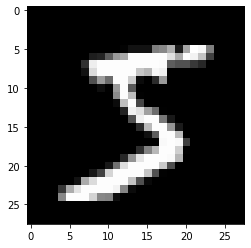

In [45]:
plt.imshow(image, 'gray')

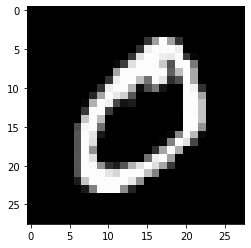

In [46]:
image = X_train[1]
plt.imshow(image, 'gray')

In [47]:
y_train[0], y_train[1]

(5, 0)

In [48]:
image.shape

(28, 28)

In [49]:
image = image.reshape(-1) # -1 만 있을때는 1차원 배열을 반환한다.
image.shape

(784,)

<function matplotlib.pyplot.show>

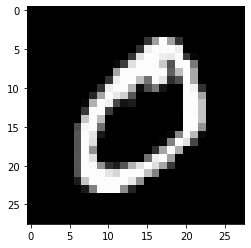

In [50]:
image_bokgu = image.reshape(28, 28)
plt.imshow(image_bokgu, 'gray')
plt.show

## MNIST를 위한 신경망 구축하기

In [51]:
# 활성화 함수 구현 ( 시그모이드 )
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# 테스트 데이터 가져오기
def get_test_data():
  (X_train, y_train), (X_test, y_test) = mnist.load_data()
  image_size = X_test.shape[0]
  X_test_reshape = X_test.reshape(image_size, -1)

  return X_test_reshape, y_test

# 훈련된 신경망 가져오기
def init_network():
  import pickle
  with open("./sample_weight.pkl", 'rb') as f:
    network = pickle.load(f)

  return network

# 예측 함수
def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

# 구현시작
# 이전층에서 흘러들어온 데이터와 현재 층의 가중치의 내적을 구하고 편향을 더한다.
# 활성화 함수를 입혀준다.

# Layer 1 계산
  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

# Layer 2 계산
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

# Layer 3 출력층 계산 ( 활성화 함수가 softmax )
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [52]:
X, y = get_test_data()
X.shape, y.shape

((10000, 784), (10000,))

In [53]:
X.shape, y.shape

((10000, 784), (10000,))

In [57]:
network = init_network()

accuracy_cnt = 0 # 맞춘 개수를 저장 ( 정답을 맞추면 1 증가 )


# 사진을 한장씩 꺼내기
for i in range(len(X)):
  pred = predict(network, X[i]) # 사진 한장 당의 softmax 결과가 나옴
  pred = np.argmax(pred) # 확률이 가장 높은 원소의 인덱스

  if pred == y[i]:
    accuracy_cnt += 1

print(float(accuracy_cnt) / len(X))

# 단점 
# 데이터가 많아질수록 시간이 오래 걸리기 때문에 효율적이지 못하다
# 해결 : 단위를 크게 해서 한번에 모아서 작업한다. 예) 100개씩 묶어서 진행

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.9207


In [58]:
X_test.shape

(10000, 28, 28)

In [59]:
image_size = X_test.shape[0]
image_size

10000

In [60]:
X_test.reshape(image_size, -1).shape

(10000, 784)

## 대량의 데이터를 쪼개서 관리하는 배치 처리

In [61]:
x, _ = get_test_data()
network = init_network()

W1, W2, W3 = network['W1'], network['W2'], network['W3']

print("입력 데이터의 shape : {}".format(x.shape))
print("첫 번째 데이터의 shape : {}".format(x[0].shape))
print("가중치 W1의 shape : {}".format(W1.shape))
print("가중치 W2의 shape : {}".format(W2.shape))
print("가중치 W3의 shape : {}".format(W3.shape))

입력 데이터의 shape : (10000, 784)
첫 번째 데이터의 shape : (784,)
가중치 W1의 shape : (784, 50)
가중치 W2의 shape : (50, 100)
가중치 W3의 shape : (100, 10)


In [62]:
X, y = get_test_data()
network = init_network()

# batch 크기 지정
# batch란? 데이터 묶음
# 예를 들어 10000개의 데이터를 100개의 묶음(batch_size)으로 만들면 100개의 배치가 생긴다.

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i : i+batch_size] # 순서대로 100개씩 쪼개서 진행
    y_batch = predict(network, x_batch) # 데이터를 100개씩 예측
    p = np.argmax(y_batch, axis = 1) # 100개의 예측 데이터에서 가장 높은 값의 인덱스를 추출
    accuracy_cnt += np.sum( p == y[i : i+batch_size]) # 100개씩 정답의 합을 구함

print("정확도 : {}".format(float(accuracy_cnt) / len(x)))

정확도 : 0.9207


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
